###**Project 2 - Part 2 (Core)**

<h3> Thandolwethu Siloyi

###**Desciption**

<h6>This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality.

<h6>The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description.

###**Data Set Information**

<h6>winery: Winery name
<h6>wine: Name of the wine
<h6>year: Year in which the grapes were harvested
<h6>rating: Average rating given to the wine by the users [from 1-5]
<h6>num_reviews: Number of users that reviewed the wine
<h6>country: Country of origin [Spain]
<h6>region: Region of the wine
<h6>price: Price in euros [€]
<h6>type: Wine variety
<h6>body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]
<h6>acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

###**Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pandas
import pandas as pd
# numpy
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
# MatplotLib
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(transform_output = 'pandas')

###**1. Load and Inspect the data**

In [ ]:
# loading the data
new_url = '/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/02-MachineLearning/Week08/Data/wines_SPA.csv'
df_wine = pd.read_csv(new_url)

In [ ]:
# display the first 5 rows
df_wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# displaying the number of rows and columns for the dataframe
df_wine.shape
print(f'There are {df_wine.shape[0]} rows, and {df_wine.shape[1]} columns')
print(f'The rows represent {df_wine.shape[0]} observations, and the columns represent {df_wine.shape[1]-1} features and 1 target variable')

There are 7500 rows, and 11 columns
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable


In [ ]:
# display the column names, count of non-null values, and their datatypes
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


###**2. Clean the Data**

###**Remove Unecessary Columns**

In [ ]:
# drop country and wine column
df_wine = df_wine.drop(columns = ['country', 'year', 'wine']).copy()

###**Duplicates**

In [ ]:
# display the number of duplicated rows in the dataset
print(f'There are {df_wine.duplicated().sum()} duplicate rows.')

There are 5452 duplicate rows.


In [ ]:
# drop duplicated rows
df_wine.drop_duplicates(inplace=True)

In [ ]:
# display the number of duplicated rows in the dataset RE-CHECKING
print(f'There are {df_wine.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


###**Missing values**

In [ ]:
# check missing values in each column
missing_values = df_wine.isnull().sum()
missing_values

winery           0
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [ ]:
# display the total number of missing values in the dataset
print(f'There are {df_wine.isna().sum().sum()} missing values')

There are 648 missing values


In [ ]:
# fill missing values for body and acidity
imputer_cols = ['body', 'acidity']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_wine[imputer_cols])
df_wine[imputer_cols] = imputer.transform(df_wine[imputer_cols])

df_wine['type'] = df_wine['type'].fillna(df_wine['type'].mode()[0])

In [ ]:
# display the total number of missing values in the dataset
print(f'There are {df_wine.isna().sum().sum()} missing values')

There are 0 missing values


In [ ]:
# checking for data types for each column
df_wine.dtypes

winery          object
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

###**Inpect Values for errors**


*   Checking for impossible or unusual values



In [ ]:
# checking for impossible values in numeric
df_wine.describe(include='number')

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,4.401123,573.994629,135.242194,4.224609,2.931641
std,0.147023,1376.153171,272.178316,0.614385,0.312912
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000



*   We could not find impossible values = 0



In [ ]:
# checking for impossible values in object
df_wine.describe(include='object')

,winery,region,type
count,2048,2048,2048
unique,480,76,21
top,Vega Sicilia,Ribera del Duero,Ribera Del Duero Red
freq,97,541,641


## **Find and Fix Inconsistancies for Categorical Values**

In [ ]:
# show categorical columns
string_col = df_wine.select_dtypes('object').columns
string_col

Index(['winery', 'region', 'type'], dtype='object')

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   rating       2048 non-null   float64
 2   num_reviews  2048 non-null   int64  
 3   region       2048 non-null   object 
 4   price        2048 non-null   float64
 5   type         2048 non-null   object 
 6   body         2048 non-null   float64
 7   acidity      2048 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 144.0+ KB


In [ ]:
# checking inconsistancies
for column in string_col:
  print(f'column={column}')
  print(df_wine[column].value_counts(dropna=False))
  print('\n\n')

column=winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



column=region
Ribera del Duero                   541
Rioja                              479
Priorato                           250
Toro                                82
Castilla y Leon                     51
                                  ... 
Ribera del Gallego-Cinco Villas      1
Monterrei                            1
Jerez Cream                          1
Condado de Huelva                    1
Abona                                1
Name: region, Length: 76, d


*   No inconsistencies found



###**Visualization of the data**

**Univariate**

**Price Target**

<Axes: xlabel='price', ylabel='Count'>

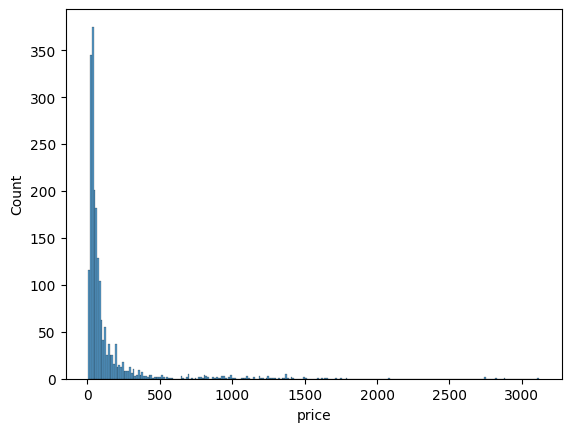

In [ ]:
sns.histplot(df_wine["price"])

<Axes: xlabel='price'>

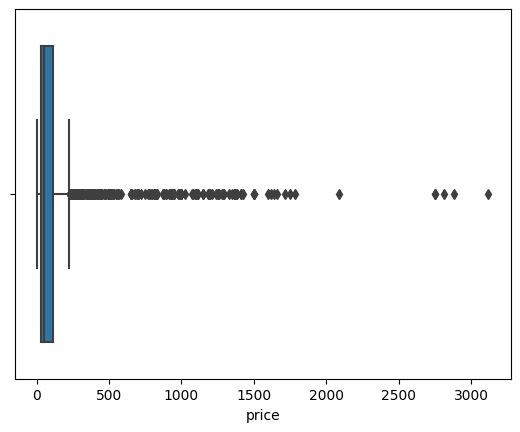

In [ ]:
sns.boxplot(x=df_wine["price"])

In [ ]:
def outliers_limits(column, threshold):
    upper = np.nanpercentile(column, 75)
    lower = np.nanpercentile(column, 25)
    iqr = upper - lower
    upper_limit = upper + threshold * iqr
    lower_limit = lower - threshold * iqr
    return lower_limit, upper_limit

In [ ]:
low_price, up_price = outliers_limits(df_wine["price"], 15)
low_price, up_price

(-1139.3128436059772, 1281.2307908806035)

In [ ]:
outliers_in = df_wine[(df_wine["price"] < low_price) | (df_wine["price"] > up_price)]
without_outliers = df_wine[(df_wine["price"] >= low_price) & (df_wine["price"] <= up_price)]

<Axes: xlabel='price', ylabel='Count'>

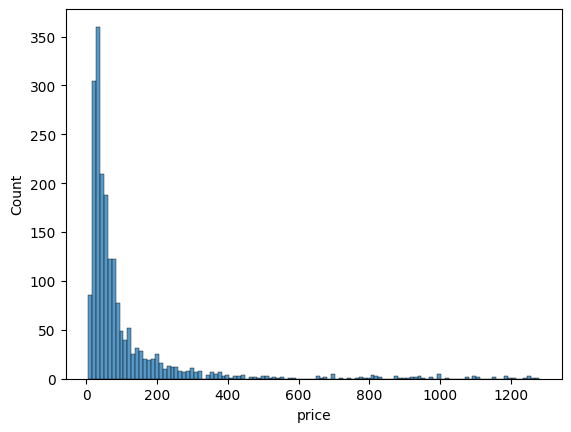

In [ ]:
sns.histplot(x=without_outliers['price'])

In [ ]:
outliers_in.sort_values('price', ascending=False)

,winery,rating,num_reviews,region,price,type,body,acidity
338,Descendientes de J. Palacios,4.6,28,Bierzo,3119.08,Red,4.0,3.0
196,Vega Sicilia,4.6,218,Ribera del Duero,2884.04,Ribera Del Duero Red,5.0,3.0
115,Bodega Numanthia,4.7,108,Toro,2814.16,Toro Red,5.0,3.0
343,Alvaro Palacios,4.6,27,Priorato,2750.00,Priorat Red,4.0,3.0
280,Alvaro Palacios,4.6,60,Priorato,2750.00,Priorat Red,4.0,3.0
92,Vega Sicilia,4.7,225,Ribera del Duero,2087.25,Ribera Del Duero Red,5.0,3.0
188,Dominio de Pingus,4.6,293,Ribera del Duero,1785.96,Ribera Del Duero Red,5.0,3.0
248,Dominio de Pingus,4.6,102,Ribera del Duero,1746.94,Ribera Del Duero Red,5.0,3.0
98,Dominio de Pingus,4.7,184,Ribera del Duero,1715.18,Ribera Del Duero Red,5.0,3.0
332,Alvaro Palacios,4.6,30,Priorato,1660.00,Priorat Red,4.0,3.0


<Axes: xlabel='price', ylabel='Count'>

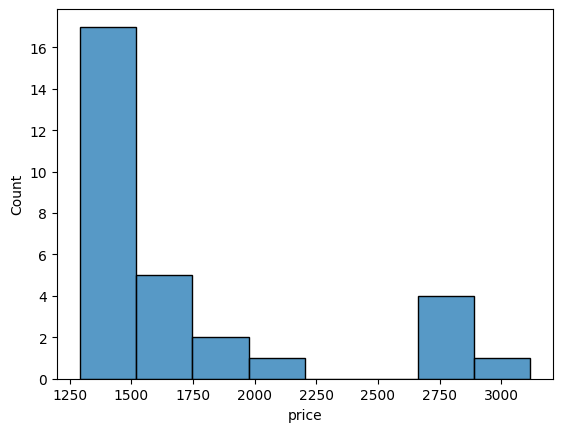

In [ ]:
sns.histplot(x=outliers_in['price'])

In [ ]:
len(outliers_in)

30

**Rating**

###**Correlation Heatmap**

In [ ]:
# showing correlation numbers
print(df_wine.corr())

               rating  num_reviews     price      body   acidity
rating       1.000000    -0.098582  0.507287  0.227597 -0.110890
num_reviews -0.098582     1.000000 -0.065395  0.088488  0.062780
price        0.507287    -0.065395  1.000000  0.181367 -0.011366
body         0.227597     0.088488  0.181367  1.000000 -0.097971
acidity     -0.110890     0.062780 -0.011366 -0.097971  1.000000


<ipython-input-29-915c7733760e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_wine.corr())


<ipython-input-30-418b38ec0664>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_wine.corr(), cmap = 'Greens', annot = True);


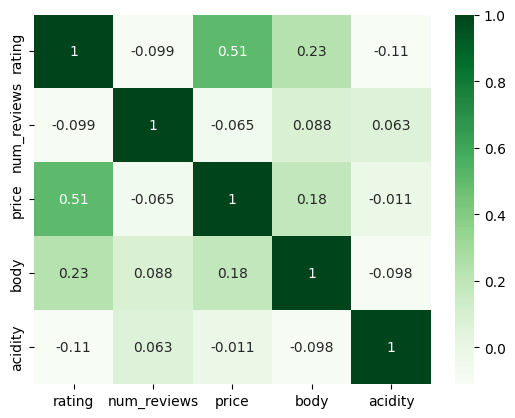

In [ ]:
# create a heatmap of the correlation matrix
sns.heatmap(df_wine.corr(), cmap = 'Greens', annot = True);

***Relationship***
*   **rating and price:** The is a moderate positive correlation between rating and price. This means that products with highr ratings tend to be more expensive, and products with lower ratings tend to be less expensive.


*   **rating and num_reviews:** There is a weak negative correlation between rating and number of reviews. This means that products with higher ratings tend to have fewer reviews, and products with lower ratings tend to have more reviews.

*   **num_reviews and price:** There is a weak negative correlation between number of reviews and price. This means that products with more reviews tend to be less expensive, and products with fewer reviews tend to be more expensive.






###**Multivariate Plot Numericals**

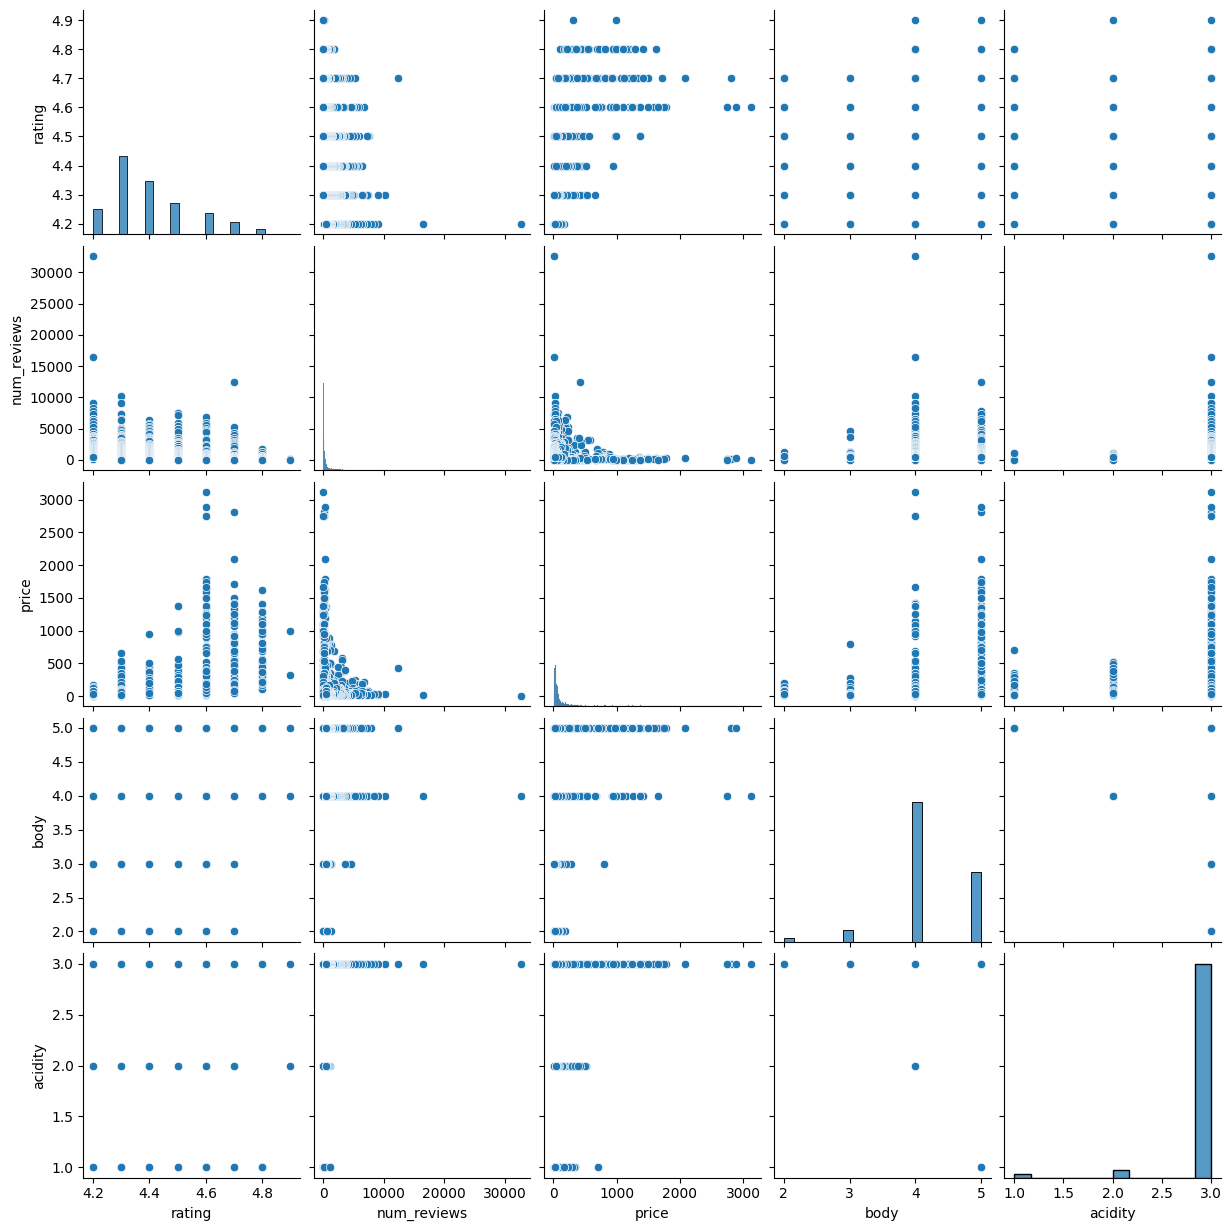

In [ ]:
# scatter plot for numeric columns
numeric_columns = df_wine.select_dtypes(np.number).columns
sns.pairplot(df_wine[numeric_columns])
plt.show()

###**Features**

**Type**

In [ ]:
# Identify categorical columns
categorical_columns = df_wine.select_dtypes(include=['object']).columns

def remove_cat(df_wine, threshold=0.05):

    for column in category_cols:
        value_counts = df_wine['type'].value_counts(normalize=True)
        remove_categories = value_counts[value_counts < threshold].index
        df_wine['type'] = df_wine['type'].apply(lambda x: 'other' if x in remove_categories else x)


# converting column 'type' to 3 different type of categories
def diff_type(type_string):
  type_string = type_string.lower()
  if 'red' in type_string:
      return 'red'
  elif 'white' in type_string:
      return 'white'
  else:
    return 'other'

df_wine['type'] = df_wine['type'].apply(diff_type)

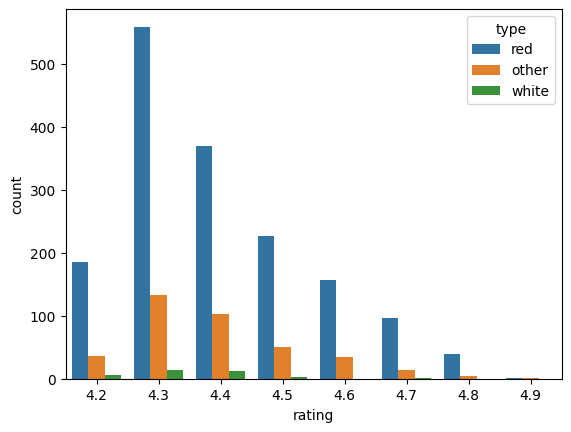

In [ ]:
# Multivariate graph to show rating and type columns
ax = sns.countplot(data=df_wine, x='price', hue='type')

*   Red wines have more ratings than  white and other wines. This means that red wines are purchased more than white and other wines.



**Price and Rating**

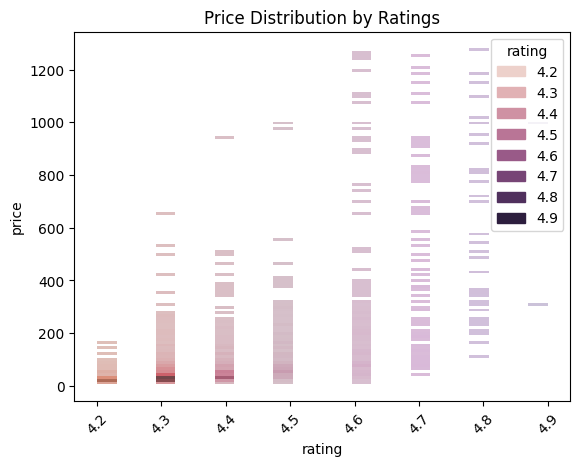

In [ ]:
# Create a histogram of the price distribution by wine type
sns.histplot(x='rating', y='price', hue='rating', data=without_outliers)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)

#fig = plt.figure(figsize=(15,8))

# Set the title
plt.title("Price Distribution by Ratings")

# Show the plot
plt.show()

*   It also shows that there are wines that are highly rated at low prices.
*   There are many good wines that have low prices.
*   Expensive wines do not have higher ratings.
*   Affordable wines have high rating.
*   Wines with less reviews tend to have high cost, wines with high reviews are *   Affordable and are accessible to a large audience. If most people have access to a certain brand they will spread the word of mouth and the product will have a lot of reviews.


**Price and Type**

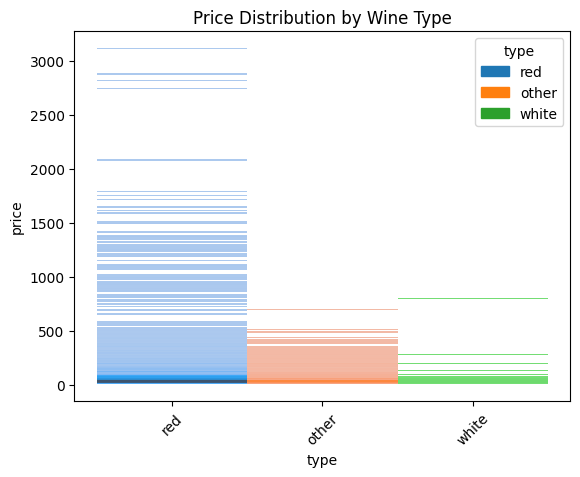

In [ ]:
# Create a histogram of the price distribution by wine type
sns.histplot(x='type', y='price', hue='type', data=without_outliers)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)

#fig = plt.figure(figsize=(15,8))

# Set the title
plt.title("Price Distribution by Wine Type")

# Show the plot
plt.show()


*   Red wines is the highest selling wine. The most common price range for wine is between €250 and €500.
*   Red wines are more expensive than white wines, and other wines. Within each wine there's a wide range of prices.
*   There are red wines that are affordable and some are expensive.





**Number of Reviews and Price**

In [ ]:
# Create a histogram of the price and acidity
fig = plt.figure(figsize=(15,8))

sns.histplot(x='num_reviews', y='price', hue='num_reviews', data=without_outliers)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)


# Set the title
plt.title("Price and Number of Reviews")

# Show the plot
plt.show()

**Acidity and Price**

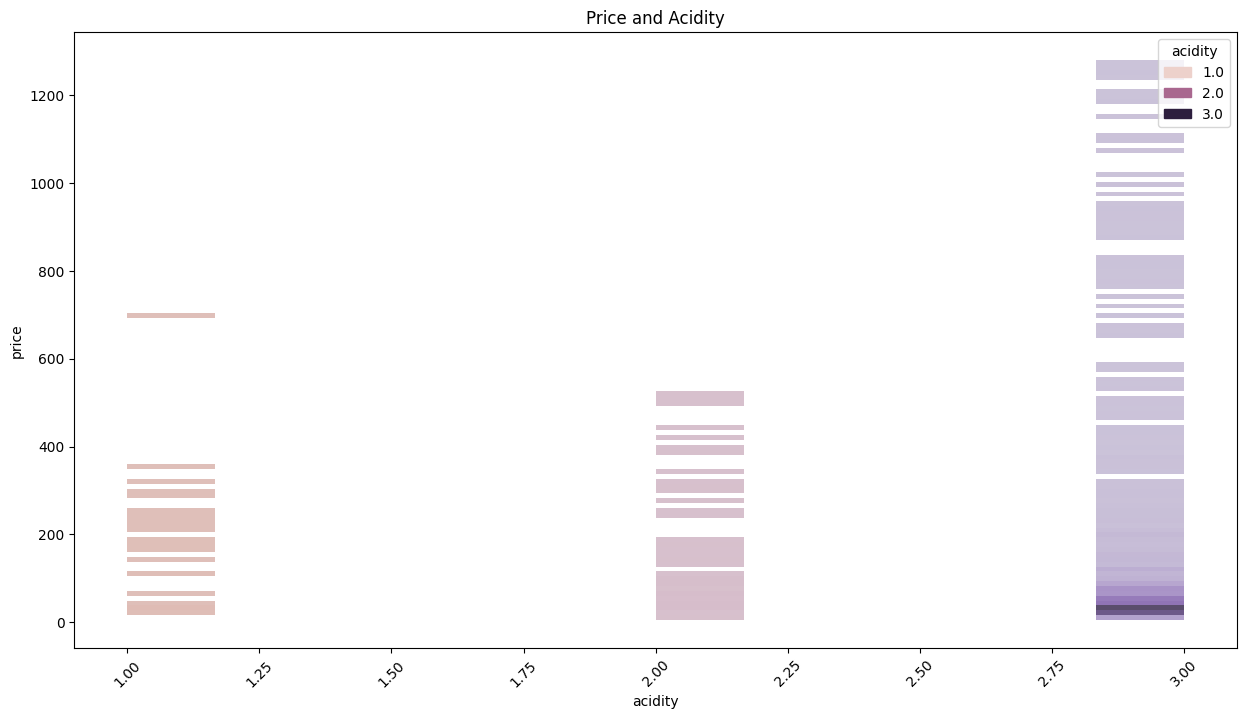

In [ ]:
# Create a histogram of the price and acidity
fig = plt.figure(figsize=(15,8))

sns.histplot(x='acidity', y='price', hue='acidity', data=without_outliers)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)


# Set the title
plt.title("Price and Acidity")

# Show the plot
plt.show()

*   The graph shows that as the acidity of the wine increases, the price of the wine also increases.
*   Consumers pay more money for wines that have higher quality.



**price and anum_reviews**

In [ ]:
# Create a histogram of the price and anum_reviews
fig = plt.figure(figsize=(15,8))

sns.histplot(x='num_reviews', y='price', hue='num_reviews', data=without_outliers)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)


# Set the title
plt.title("Price and Number of Reviews")

# Show the plot
plt.show()

** Price and Region**

In [ ]:
# Create a histogram of the price and region
fig = plt.figure(figsize=(15,8))

sns.histplot(x='region', y='price', hue='region', data=without_outliers)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)


# Set the title
plt.title("Price and Number of Reviews")

# Show the plot
plt.show()

###**Handle Nulls**

In [ ]:
# body column
# we can fill body na values using mean as its std is small so data are almost in very narrow range
df_wine['body'] = df_wine['body'].fillna(value=df_wine['body'].mode().iloc[0])

In [ ]:
# impute missing values
missing_values = df_wine.isnull().sum()
missing_values

winery         0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

###**Model Validation Data Split**

###**Check Class Balance**

In [ ]:
ml_df = df_wine.copy()

In [ ]:
# check how samples of each class are present
ml_df['price'].value_counts(normalize=False)

75.00     16
95.00     12
34.90     12
59.90     12
26.90     11
          ..
75.92      1
47.52      1
94.20      1
185.15     1
995.00     1
Name: price, Length: 1292, dtype: int64

In [ ]:
# check how many samples of each class are present
ml_df['price'].value_counts(normalize=True)

75.00     0.007812
95.00     0.005859
34.90     0.005859
59.90     0.005859
26.90     0.005371
            ...   
75.92     0.000488
47.52     0.000488
94.20     0.000488
185.15    0.000488
995.00    0.000488
Name: price, Length: 1292, dtype: float64

###**Modeling**

In [ ]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

In [ ]:
# Addressing missing values

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_wine[['body', 'acidity']] = imputer.fit_transform(df_wine[['body', 'acidity']])


# For 'type', we will fill the missing values with the most frequent value
df_wine['type'] = df_wine['type'].fillna(df_wine['type'].mode()[0])

print(missing_values)

winery         0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64


In [ ]:
# Remove categories that appear less than 3%
for column in categorical_columns:
    value_counts = df_wine[column].value_counts(normalize=True)
    remove_categories = value_counts[value_counts < 0.03].index
    df_wine[column] = df_wine[column].apply(lambda x: 'other' if x in remove_categories else x)# Identify categorical columns
categorical_columns = df_wine.select_dtypes(include=['object']).columns

In [ ]:
# defining X and y
X = ml_df.drop(columns=['price'])
y = ml_df['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)


In [ ]:
# Define models
models = [DecisionTreeRegressor(), RandomForestRegressor()]

# Training the models and printing their performance
for model in models:
    # Fit model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"{model.__class__.__name__}")
    print("----"*10)
    print(f"Train MSE: {mean_squared_error(y_train, y_pred_train)}")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}")
    print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
    print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
    print("Train R^2:", r2_score(y_train, y_pred_train))
    print("Test R^2:", r2_score(y_test, y_pred_test))
    print("\n")

ValueError: ignored

In [ ]:
# defining X and y
X = ml_df.drop(columns=['price'])
y = ml_df['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)


In [ ]:
def eval_regression(true, pred, name='Model'):
  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
  scores['MAE'] = [mean_absolute_error(true, pred)]
  scores['R2'] = [r2_score(true, pred)]
  return scores

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
label_encoder = LabelEncoder()
mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

num_cols = X_train.select_dtypes('number').columns
cat_cols = make_column_selector(dtype_include='object')


num_pipe = make_pipeline(scaler, mean_imputer)
cat_pipe = make_pipeline(missing_imputer,ohe)
ord_pipe = make_pipeline(scaler, mean_imputer)

processor = make_column_transformer(
    (num_pipe, num_cols),
    (cat_pipe, cat_cols)
)

###**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = make_pipeline(processor, DecisionTreeRegressor(random_state = 42))
tree_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9c946d6cb0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
train_pred = tree_model.predict(X_train)
test_pred = tree_model.predict(X_test)

In [ ]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

In [ ]:
print(f'Training R2 {r2_score(y_train, train_pred):.2f}')
print(f'Test R2 {r2_score(y_test, test_pred):.2f}')

Training R2 1.00
Test R2 0.07


In [ ]:
dec_train_scores = eval_regression(y_train, train_pred, name='Dec Tree train')
dec_test_scores = eval_regression(y_test, test_pred, name='Dec Tree Test')

In [ ]:

print(dec_train_scores)
print(dec_test_scores)

       Model Name      RMSE       MAE        R2
0  Dec Tree train  1.531916  0.071973  0.999969
      Model Name        RMSE        MAE        R2
0  Dec Tree Test  251.192537  81.751089  0.070092


###**Random Forest Regressor Model**

In [ ]:
# Custom function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

ran_forest = RandomForestRegressor(random_state = 42)

# random forest pipeline
ran_forest_pipe = make_pipeline(processor, ran_forest)

# fit model pipe line
ran_forest_pipe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9c946d6cb0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# show classification report
evaluate_regression(ran_forest_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 24.765
- MSE = 4,644.714
- RMSE = 68.152
- R^2 = 0.939

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 66.072
- MSE = 39,230.585
- RMSE = 198.067
- R^2 = 0.422


**SMOTE**

In [ ]:
## Display the value counts for y_train
y_train.value_counts()

75.00     11
65.00      8
95.00      8
59.90      8
26.90      7
          ..
78.50      1
33.15      1
59.87      1
159.80     1
37.86      1
Name: price, Length: 1058, dtype: int64

In [ ]:
## Create an instance of the transformer
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
# Split the dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ValueError: ignored

###**GridSearchCV Tuning**

In [ ]:
ran_forest_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                               

In [ ]:
# defining param grid
param_ = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
                   }

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the gridsearch
gridsearch = GridSearchCV(ran_forest_pipe, param_, n_jobs = -1, cv = 3, verbose = 1)

In [ ]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        stra...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [ ]:
# Checking for best parameters
best_rf = gridsearch.best_estimator_

In [ ]:
# refitting the best model
evaluate_regression(best_rf, X_train, X_test, y_train, y_test)

ValueError: ignored

###**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Baseline Model**

In [ ]:
# Imports
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
## Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay

###**PCA**